In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Считаем данные в pandas DataFrame
data = pd.read_excel('data.xlsx')

Взглянем на данные.

In [5]:
data[:12]

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.000000
1,Абрамов Е. Д.,2009-02-01,Уборщик,3,Пилигримовые станы,18,790,16638.000000
2,Абрамов Е. Д.,2009-03-01,Уборщик,3,Пилигримовые станы,18,820,16638.000000
3,Абрамов Е. Д.,2009-04-01,Уборщик,3,Пилигримовые станы,18,1200,19396.411765
4,Абрамов Е. Д.,2009-05-01,Уборщик,3,Пилигримовые станы,18,1250,19790.470588
5,Абрамов Е. Д.,2009-06-01,Уборщик,3,Пилигримовые станы,18,950,17426.117647
6,Абрамов Е. Д.,2009-07-01,Уборщик,3,Пилигримовые станы,18,1400,20972.647059
7,Абрамов Е. Д.,2009-08-01,Уборщик,3,Пилигримовые станы,18,1180,19238.788235
8,Абрамов Е. Д.,2009-09-01,Уборщик,3,Пилигримовые станы,18,1080,18450.670588
9,Абрамов Е. Д.,2009-10-01,Уборщик,3,Пилигримовые станы,18,780,16638.000000


In [6]:
data['Профессия'].value_counts()/12

Вальцовщик                              51.0
Нагревальщик металла                    42.0
Подручный вальцовщика                   30.0
Оператор поста управления               27.0
Уборщик                                 21.0
Контролер качества готовой продукции     9.0
Посадчик металла                         8.0
Резчик горячего металла                  7.0
Огнеупорщик                              5.0
Name: Профессия, dtype: float64

In [7]:
data['Оборудование'].value_counts()/12

Пилигримовые станы                     59.0
Нагревательные печи                    38.0
Прошивной стан                         31.0
Калибровочный стан                     31.0
Нагревательные печи, нагрев             9.0
Контрольно-измерительная аппаратура     9.0
Вспомогательные помещения               9.0
Нагревательные печи, кантовка           8.0
Калибровочный стан, ГРП                 6.0
Name: Оборудование, dtype: float64

In [8]:
data['Разряд'].value_counts()/12

4    56.0
5    41.0
7    38.0
3    35.0
6    30.0
Name: Разряд, dtype: float64

In [9]:
data['Вредность (балл.)'].value_counts()/12

18    93.0
22    50.0
8     27.0
0     18.0
16     7.0
11     5.0
Name: Вредность (балл.), dtype: float64

In [10]:
# После первого взгляда на данные, можно отметить, что признаки: Профессия, Разряд, Оборудование и Вредность (балл.)
# не изменяются в течении года для каждого рабочего.
# С помощью следующего кода убедимся в этом наверняка. Если у какого нибудь рабочего изменится один из признаков 
# в течении года, в соответствующий список слоаваря добавится его фамилия.
lens = {'Профессия': [],
       'Разряд': [],
       'Оборудование': [],
       'Вредность (балл.)': []
       }

for feat in list(lens.keys()):
    for i in list(data['FIO'].value_counts().index):
        if len(data.loc[data['FIO'] == i][feat].value_counts()) > 1:
            lens[feat].append(i) 
            
lens

{'Профессия': [], 'Разряд': [], 'Оборудование': [], 'Вредность (балл.)': []}

Как мы видим, первоначальная догадка оказалась верной.

Теперь посмотрим на то, какие признаки влияют на доход.

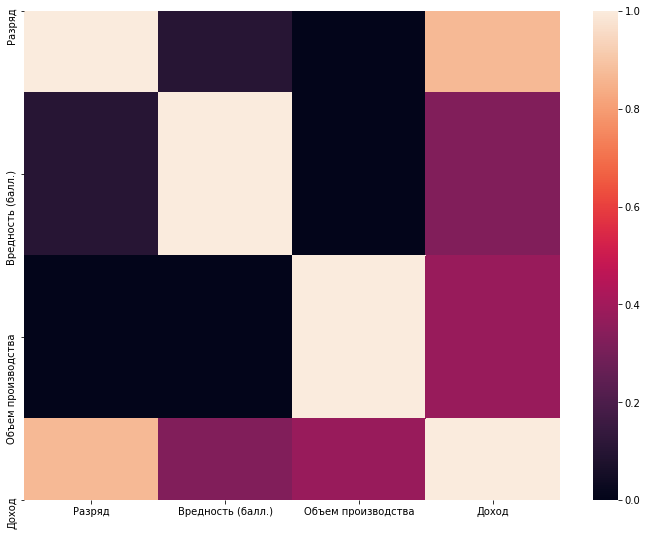

In [11]:
# Отобразим корреляции между численными признаками, включая Доход.
corrmat = data[['Разряд', 'Вредность (балл.)','Объем производства', 'Доход']].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat)

Видим, что все признаки коррелируют с доходом, и при этом почти не коррелируют между собой.

Далее мы можем взглянуть на то, как категориальные признаки влияют на доход. Для этого для каждого признака, а потом для каждого значания выбранного признака возьмём среднее значение дохода. И, для наглядности, построим графики этих средних значений после сортировки.

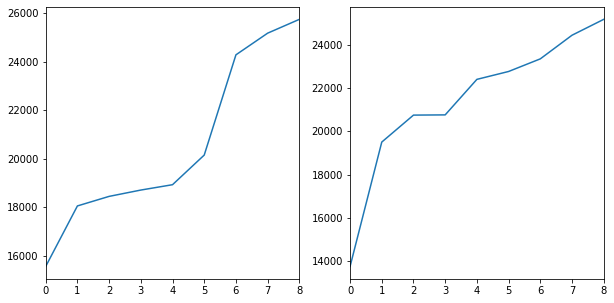

In [12]:
def cat_cor(feat):
    means = []
    for cat in list(data[feat].value_counts().index):
        means.append(data[data[feat] == cat]['Доход'].mean())
    return means

prof = cat_cor('Профессия')
oborud = cat_cor('Оборудование')

fig, axes = plt.subplots(nrows=1, ncols=2)
pd.Series(sorted(prof)).plot(ax=axes[0], figsize=(10,5))
pd.Series(sorted(oborud)).plot(ax=axes[1], figsize=(10,5))

Графики выглядят так, как будто эти признаки, если и влияют на доход, то косвенно. Так, например, можем предположить, что "разряд" не численный признак, а категориальный и посроить для него такой же график.

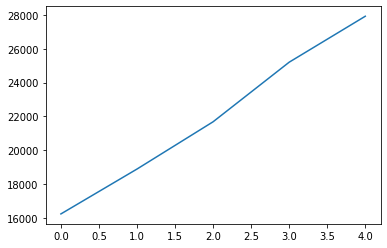

In [13]:
raz = cat_cor('Разряд')
plt.plot(sorted(raz))

Мы опять убедились, что "разряд" очень сильно влияет на доход. Остановимся пока что на мысли, что "Профессия" и "Оборудование" не влияют на "доход" непосредственно.

Теперь, перейдём к пошаговому выявлению формулы расчёта, для этого будем по возможности исключать влияние некоторых признаков и попытаемся увидеть структуру оставшихся данных.

И сразу видно, что на "доход" влияет "объём производства". Давайте взглянем на то, как он влияет на примере одного рабочего.

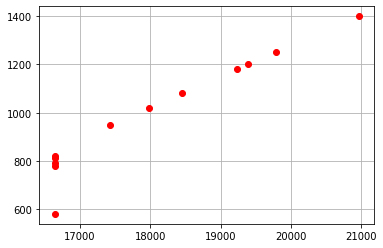

In [14]:
plt.plot(data['Доход'][:12], data['Объем производства'][:12], 'ro')
plt.grid(True)

"Объём производства" влияет на "доход" линейно, при пересечении порогового значения. До этого порога "Объём производства" не имеет значения. Поэтому можно исключить этот признак, оставив строки, в которых "объём производства" = 580.

In [15]:
data[data['Объем производства'] == 580].head(10)

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.0
12,Абрамов Ф. М.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16029.0
24,Агафонов С. И.,2009-01-01,Вальцовщик,6,Пилигримовые станы,18,580,22260.0
36,Аксенов Е. Н.,2009-01-01,Нагревальщик металла,7,Нагревательные печи,22,580,26020.0
48,Александров А. М.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,15420.0
60,Алексеев Н. Н.,2009-01-01,Нагревальщик металла,5,"Нагревательные печи, кантовка",22,580,20350.0
72,Андреев Е. А.,2009-01-01,Вальцовщик,5,Калибровочный стан,18,580,20449.5
84,Андреев Ф. Д.,2009-01-01,Оператор поста управления,5,Калибровочный стан,8,580,18649.5
96,Антонов В. Т.,2009-01-01,Контролер качества готовой продукции,7,Контрольно-измерительная аппаратура,0,580,22060.0
108,Баженов Д. И.,2009-01-01,Оператор поста управления,5,"Калибровочный стан, ГРП",8,580,18649.5


Следующим шагом можем исключить признак "Профессия", выбрав одну профессию и выводить таблицу рабочих только этой профессии. Взглянув на строки с рабочими с одинаковой профессии я обнаружил, что профессий "Уборщик" обладают рабочие с разным "баллом вредности". 

In [16]:
data[data['Объем производства'] == 580]\
    [data['Профессия'] == "Уборщик"]

C:\Games\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.0
12,Абрамов Ф. М.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16029.0
48,Александров А. М.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,15420.0
384,Воронов Р. И.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,15420.0
468,Григорьев А. Т.,2009-01-01,Уборщик,3,Вспомогательные помещения,0,580,12180.0
612,Журавлев Б. И.,2009-01-01,Уборщик,3,Вспомогательные помещения,0,580,12180.0
792,Клюев Д. М.,2009-01-01,Уборщик,3,Вспомогательные помещения,0,580,12180.0
864,Комаров А. И.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,15420.0
912,Кондратьев Д. Д.,2009-01-01,Уборщик,3,Вспомогательные помещения,0,580,12789.0
984,Краснов И. М.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,15420.0


Можно сделать первоначальный вывод об окладе. Минимальный "доход" уборщика как раз и будет окладом - 12180.

В показанной выше таблице есть уборщики с абсолютно одинаковыми признаками, но разным доходом. И тут мы с лёгкостью можем определить, что эта разница равняется 5% и 10%. (Достаточно взглянуть на строки рабочих: Степанов А. М., Федотов М. М., Чернышев Д. В.)

In [17]:
data.loc[[2004, 2148, 2292]]

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
2004,Степанов А. М.,2009-01-01,Уборщик,3,Вспомогательные помещения,0,580,12789.0
2148,Федотов М. М.,2009-01-01,Уборщик,3,Вспомогательные помещения,0,580,13398.0
2292,Чернышев Д. В.,2009-01-01,Уборщик,3,Вспомогательные помещения,0,580,12180.0


Значит доходом без индивидуальных надбавок для строк с одинаковым набором признаков будет минимальное значение дохода в подвыборке.

Таким же образом мы можем определить, что минимальный доход для уборщиков с баллом вредности, равным 18, это 15420.

In [18]:
data.loc[[0, 12, 48]]

,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
0,Абрамов Е. Д.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16638.0
12,Абрамов Ф. М.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,16029.0
48,Александров А. М.,2009-01-01,Уборщик,3,Пилигримовые станы,18,580,15420.0


Таблица приведённая выше доказывает предположение о индивидуальных надбавах. Но при это ещё и подчёркивает, что балл вредности не влияет на эти надбавки, они равны 5% и 10% от 12180, то есть, оклада.

Далее, сравнив минимальный доход для уборщиков с баллом вредности, равным 18, это 15420, и минимальный доход для уборщиков с баллом вредности, равным 0, это 12180, можем предположить, что каждый балл вредности добавляет 180 к доходу. (15420 - 12180 = 3240 = 180 * 18). Формула влияния балла вредности на "доход" данным образом подтверждается и для других профессий.

Теперь взглянем на профессию "Вальцовщик". (строки с "объёмом производства" равным 580).

In [19]:
data[data['Объем производства'] == 580]\
    [data['Профессия'] == "Вальцовщик"].head()

C:\Games\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
24,Агафонов С. И.,2009-01-01,Вальцовщик,6,Пилигримовые станы,18,580,22260.0
72,Андреев Е. А.,2009-01-01,Вальцовщик,5,Калибровочный стан,18,580,20449.5
120,Белкин В. И.,2009-01-01,Вальцовщик,7,Пилигримовые станы,18,580,25300.0
168,Белоусов М. Д.,2009-01-01,Вальцовщик,6,Пилигримовые станы,18,580,23211.0
192,Богданов А. Т.,2009-01-01,Вальцовщик,7,Прошивной стан,18,580,26403.0


Видим, что "вальцовщики" имеют разряды 5, 6 и 7. Это подтверждает теорию, что признак "профессия" сам по себе не влияет на "доход", но влияет разряд.

In [20]:
data[data['Объем производства'] == 580]\
    [data['Профессия'] == "Вальцовщик"]\
    [data['Разряд'] == 5]

C:\Games\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Games\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,FIO,Месяц,Профессия,Разряд,Оборудование,Вредность (балл.),Объем производства,Доход
72,Андреев Е. А.,2009-01-01,Вальцовщик,5,Калибровочный стан,18,580,20449.5
288,Винокуров М. Т.,2009-01-01,Вальцовщик,5,Калибровочный стан,18,580,20449.5
1020,Кузнецов Д. М.,2009-01-01,Вальцовщик,5,Калибровочный стан,18,580,20449.5
1032,Кузнецов О. А.,2009-01-01,Вальцовщик,5,Калибровочный стан,18,580,19630.0
1308,Михайлов С. М.,2009-01-01,Вальцовщик,5,Калибровочный стан,18,580,19630.0
1644,Поляков Д. А.,2009-01-01,Вальцовщик,5,Калибровочный стан,18,580,20449.5
1944,Соловьев В. М.,2009-01-01,Вальцовщик,5,Калибровочный стан,18,580,19630.0
2040,Терентьев М. Д.,2009-01-01,Вальцовщик,5,Калибровочный стан,18,580,19630.0
2088,Третьяков В. А.,2009-01-01,Вальцовщик,5,Калибровочный стан,18,580,20449.5
2364,Щербаков А. М.,2009-01-01,Вальцовщик,5,Калибровочный стан,18,580,19630.0


Можем сделать вывод, что индивидуальные надбавки для 5 разряда составляют 5% от минимального оклада среди вальцовщиков этого разряда (с поправкой на "балл вредности" 16390 = 19630 - 180 * 18). И это наводит на мысль, что окалды для кадого разряда разные и строго определённые.

Взглянув на полную таблицу вальцовщиков (с объёмом производства, равным 580), явно видно, что оклад для 5 разряда равен 16390, для 6 - 19020, для 7 - 22060. С помощью таблиц для рабочих с другими разрядами я определил оклады для каждого из них.
В итоге имеем оклады:

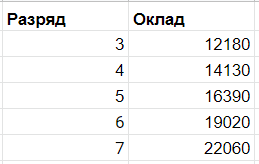

У меня есть два предположения, по поводу того, как образуется оклад: Либо оклад жёстко установлен для каждого разряда работодателем, либо он образуется по некой формуле. 

Давайте, ради интереса, попробуем получить эту формулу. "Ради интереса" - потому, что это явно не линейная функия, и мне слабо верится, что на предприятиях используют сложные формулы, приводящие к некрасивым и неудобным вычислениям и числам.

Построив график зависимости оклада от разряда, становится понятно, что функция не линейная, а скорее квадратичная. Применив полиномиальную аппроксимацию второй степени, видно, что полученная кривая очень точно ложится на график.

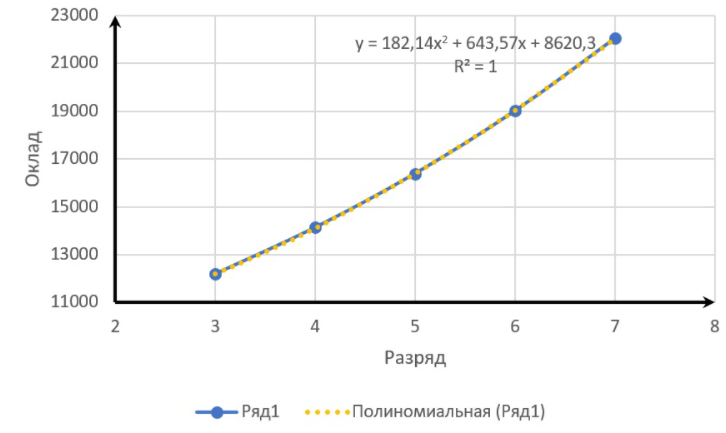

В итоге, оклад равен 182.14*x**2 + 643.57*x + 8620.3, где x - разряд

Осталось выявить влияние "Объёма производства" на "доход". Для этого вернёмся к ранее построенному графику.

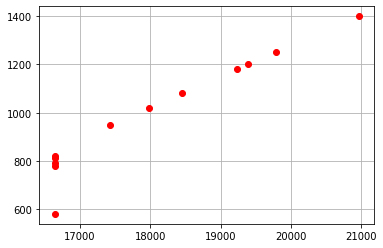

In [21]:
plt.plot(data['Доход'][:12], data['Объем производства'][:12], 'ro')
plt.grid(True)

Нам необходимо узнать значение порога "Объёма производства" и коэффициент прямой. Мы уже имеем представление об итоговой формуле, поэтому для рассчёта двух неизвестных нам нужно решить систему из двух уравнений для двух рзных точек, принадлежащих прямой.

(1) 

(2) 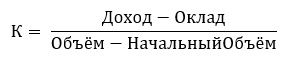

Приравняв формулы для К с разными "доходами" и "объёмами" вычисляем "Начальный объём" - 850.
После чего подставим его в формулу (2) и получим К = 7,881

Ответ:

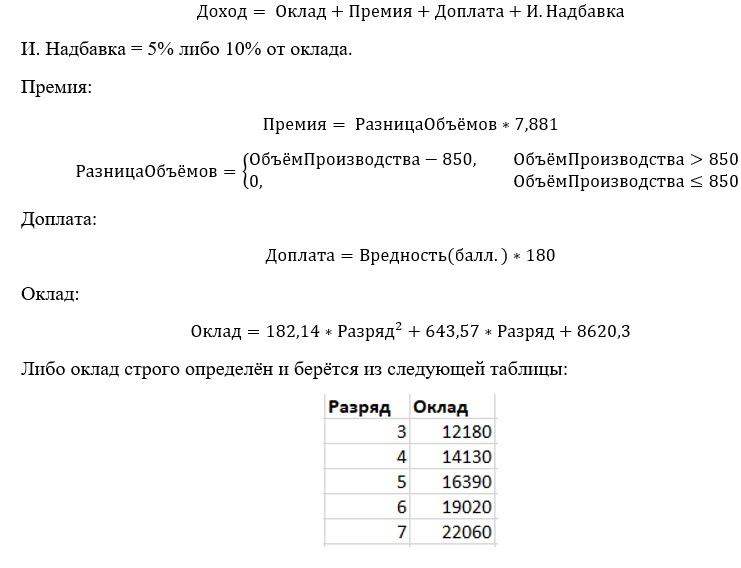